<a href="https://colab.research.google.com/github/sylviawanjiku/nlp_ok_survey_response/blob/master/ok_survey_response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirements to Install

In [253]:
%%capture
!pip install transformers
!pip install git+https://github.com/nexxt-intelligence/DeepMoji@tf-keras
!pip install wordcloud matplotlib
!pip3 install sweetviz
!pip install emojis

Import packages

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import re
import nltk          #for removing stopwords
import string
from string import punctuation
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download("punkt")
nltk.download("wordnet")

from wordcloud import WordCloud,STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import linear_model
from sklearn.model_selection import train_test_split


nltk.download('all')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_pe

True

Loading ok_survey_response Dataset

In [255]:
df = pd.read_csv('ok_survey_responses.csv',encoding='utf-8')
df.head()

,survey_message
0,y
1,16.06.2022
2,ndio
3,Y
4,NO


Data Description

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3133818 entries, 0 to 3133817
Data columns (total 1 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   survey_message  object
dtypes: object(1)
memory usage: 23.9+ MB


In [257]:
df.describe()

,survey_message
count,3132964
unique,517772
top,Ndio
freq,410553


Sort the text

In [258]:
df.sort_values(by=["survey_message"])

,survey_message
2654869,!
515782,!
2754699,!
2986663,!
2596214,!
...,...
3121534,NaN
3121754,NaN
3124768,NaN
3125237,NaN


Group the text

In [259]:
grouped_df = df.groupby('survey_message', as_index=False).count()

In [260]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517772 entries, 0 to 517771
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   survey_message  517772 non-null  object
dtypes: object(1)
memory usage: 4.0+ MB


In [261]:
grouped_df.describe()


,survey_message
count,517772
unique,517772
top,!
freq,1


In [262]:
grouped_df.to_csv("grouped_ok_survey_message.csv")

In [263]:
print(grouped_df)

         survey_message
0                     !
1                ! 694m
2               ! Fever
3                  ! NN
4         !!!!!,,,,,,??
...                 ...
517767               ��
517768  �� ms�ad�  ile?
517769            ��amd
517770           ��e�eh
517771                👍

[517772 rows x 1 columns]


In [264]:
from google.colab import files
files.download('grouped_ok_survey_message.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descriptive Summary

Plot Emoji Word Cloud 🥺

Convert text to lower case 

In [265]:
df["survey_message"] = df["survey_message"].str.lower().apply(str)


In [266]:
emoji_text = df['survey_message'].apply(str)

In [267]:
import itertools
import emojis

emojis_list=[]

for survey_text in emoji_text:
  emoji_present = list(emojis.get(survey_text))
  if emoji_present:
    emojis_list.append(emoji_present)
    # One-Liner to union a list of sets
    emojis_list = list(itertools.chain.from_iterable(emojis_list))

In [268]:
emojis_updated_list = [x for x in emojis_list if x !='️']
print(emojis_updated_list)

['🙏', '👍']


In [269]:
from collections import Counter
Counter(emojis_updated_list).most_common()

[('🙏', 1), ('👍', 1)]

In [270]:
import string
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

class EmojiCloud:
    def __init__(self,
                 font_path='Symbola.ttf',
                 color='yellow'):
        self.font_path = font_path
        self.color = color
        self.word_cloud = self.initialize_wordcloud()
        self.emoji_probability = None

    def initialize_wordcloud(self):
        word_cloud = WordCloud(font_path=self.font_path,
                               width=2000,
                               height=1000,
                               background_color='white',
                               random_state=42,
                               collocations=False)
        return word_cloud

    def color_func(self, word, font_size, position, orientation, random_state=None,
                   **kwargs):
        hue_saturation = {
            'yellow': '42, 88%',
            'blue': '194, 49%',
            'green': '159, 42%',
            'grey': '45, 2%'
        }.get(self.color)

        current_emoji_probability = self.emoji_probability[word]
        # Use 50% opacity for emojis with 20% or more coverage
        if current_emoji_probability >= 0.20:
            opacity = 50
        else:
            # Use an opacity between 60 to 65 for other emojis
            opacity = 65 - current_emoji_probability/0.2 * 5
        return f"hsl({hue_saturation},{opacity}%)"

    def generate(self, emojis):
        emoji_frequencies = Counter(emojis)
        total_count = len(emojis)
        
        # Calculate probabilities of emojis from frequency counts
        self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        
        # Use wordcloud library to generate a wordcloud of emojis
        wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        
        # Recolor emojis according to their frequency
        plt.imshow(wc.recolor(color_func=self.color_func, random_state=42),
                   interpolation="bilinear")
        plt.axis("off")

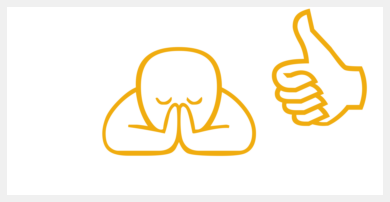

In [271]:
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf', color='yellow')
emoji_cloud.generate(emojis_updated_list)

In [272]:
SPECIAL_TOKENS = {
    'quoted': 'quoted_item',
    'non-ascii': 'non_ascii_word',
    'undefined': 'something'
}

def cleaning(text, stem_words=True):    
    def pad_str(s):
        return ' '+s+' '
    
    if pd.isnull(text):
        return ''

    stops = set(stopwords.words("english"))
    # Clean the text, with the option to stem words.
    
    # Empty question
    
    if type(text) != str or text=='':
        return ''

    # Clean the text
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub("[%s]" % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub("\w*\d\w*", "", text)


    text = re.sub("\'s", " ", text) 
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE)
    text = re.sub("\'ve", " have ", text)
    text = re.sub("can't", "can not", text)
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE)
    text = re.sub("\'re", " are ", text)
    text = re.sub("\'d", " would ", text)
    text = re.sub("\'ll", " will ", text)
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE)
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text)
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)
    
    # remove comma between numbers, i.e. 15,000 -> 15000
    
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)
    
    ## all numbers should separate from words, this is too aggressive
    
    def pad_number(pattern):
        matched_string = pattern.group(0)
        return pad_str(matched_string)
    text = re.sub('[0-9]+', pad_number, text)
    
    # add padding to punctuations and special chars, we still need them later
    
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)
    text = re.sub('amp', "", text)
    
    def pad_pattern(pattern):
       matched_string = pattern.group(0)
       return pad_str(matched_string)
    text = re.sub('[\!\?\@\^\+\*\/\,\~\|\`\=\:\;\.\#\\\]', pad_pattern, text) 
        
    text = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), text) # replace non-ascii word with special word
    
    
    text = [c for c in text if c not in string.punctuation]
    text = [c for c in text if c != '\n'] # Removing newline
    text = ''.join(text)
    text = text.split('https')[0] # Remove links
    
    # replace the float numbers with a random number, it will be parsed as number afterward, and also been replaced with word "number"
    
    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)
    
    text = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(text))
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation]).lower()
       # Return a list of words
    return text

In [273]:
df['new_survey_message'] = df['survey_message'].apply(cleaning)
df.head(5)

,survey_message,new_survey_message
0,y,y
1,16.06.2022,
2,ndio,ndio
3,y,y
4,no,no


In [274]:
df.describe()

,survey_message,new_survey_message
count,3133818,3133818
unique,489618,411175
top,ndio,
freq,507197,593748


In [275]:
del df["survey_message"]

In [276]:
df.dropna()

,new_survey_message
0,y
1,
2,ndio
3,y
4,no
...,...
3133813,
3133814,daktari mwenye nlipata alinihudumia vyema kwa ...
3133815,a
3133816,a


In [277]:
df.describe()

,new_survey_message
count,3133818
unique,411175
top,
freq,593748


In [278]:
df.to_csv("new_ok__survey_message.csv")

In [279]:
def nonasciiword (text):
  text = re.sub("nonasciiword","",text)

  return text

In [284]:
df['new_survey_message_clean'] = df['new_survey_message'].apply(nonasciiword)
df.head(3)


,new_survey_message,new_survey_message_clean
0,y,y
1,,
2,ndio,ndio


In [285]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['new_survey_message_without_stopwords'] = df['new_survey_message_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [286]:
print(df)

                                        new_survey_message  \
0                                                        y   
1                                                            
2                                                     ndio   
3                                                        y   
4                                                       no   
...                                                    ...   
3133813                                                      
3133814  daktari mwenye nlipata alinihudumia vyema kwa ...   
3133815                                                  a   
3133816                                                  a   
3133817                                                  a   

                                  new_survey_message_clean  \
0                                                        y   
1                                                            
2                                                     ndio   
3      

In [287]:
!pip install NoelNLP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [288]:
from NoelNLP import stopList 
stop_words_swa = stopList() 

In [289]:
df['new_survey_message_without_stopwords_swa'] = df['new_survey_message_without_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_swa)]))

In [290]:
text_data =df[['new_survey_message_without_stopwords']]

In [291]:
text_data.head(10)

,new_survey_message_without_stopwords
0,
1,
2,ndio
3,
4,
5,
6,e
7,stop
8,
9,ndio


In [292]:
filter = text_data["new_survey_message_without_stopwords"] != ""
dfNew = df[filter]

In [293]:
print(dfNew)

                                        new_survey_message  \
2                                                     ndio   
6                                                        e   
7                                                     stop   
9                                                     ndio   
12       dear marcyline your fuliza mpesa limit is ksh ...   
...                                                    ...   
3133807                     niko mwezi nane na wiki  mbili   
3133808                                            ahsante   
3133809                                                yes   
3133812                                             miezi    
3133814  daktari mwenye nlipata alinihudumia vyema kwa ...   

                                  new_survey_message_clean  \
2                                                     ndio   
6                                                        e   
7                                                     stop   
9      

In [294]:
dfNew.describe()

,new_survey_message,new_survey_message_clean,new_survey_message_without_stopwords,new_survey_message_without_stopwords_swa
count,2125656,2125656,2125656,2125656
unique,410294,410252,390455,361126
top,ndio,ndio,ndio,ndio
freq,514473,514473,519807,520129


Exploratory Data Analysis

In [295]:
# importing sweetviz
import sweetviz as sv

In [296]:
#to analyze the data and create a report, simply call analyze() method passing in the dataframe as argument
report = sv.analyze(dfNew)

#display the report as html
report.show_html('ok_survey.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ok_survey.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Word Cloud

In [297]:
# Create a word cloud
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (12, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    
    plt.show()

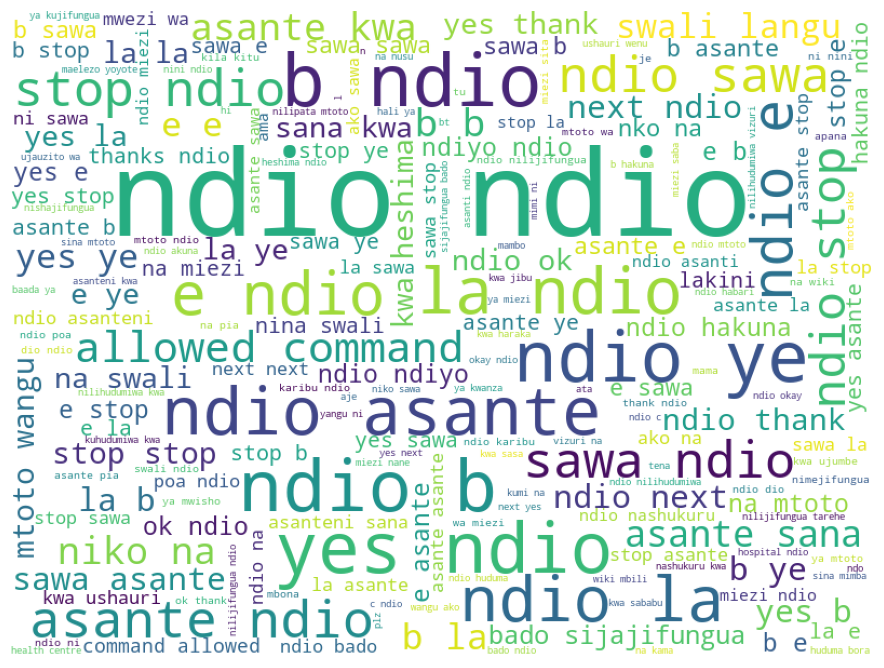

In [298]:
#Display the word cloud
cloud(' '.join(dfNew['new_survey_message_without_stopwords']))

In [299]:
# Get Word Value Counts.
from collections import Counter
dfNew['text_list'] = dfNew['new_survey_message_without_stopwords'].apply(lambda x:str(x).split())
top = Counter([item for sublist in dfNew['text_list'] for item in sublist]) # Counts the frequency of words.
temp = pd.DataFrame(top.most_common(100)) # DataFrame of top 20
temp.columns = ["common_words", "count"]
temp.style.background_gradient(cmap="Blues")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,common_words,count
0,ndio,560988
1,b,121845
2,yes,114686
3,e,98795
4,asante,98313
5,la,96631
6,na,90170
7,sawa,84255
8,stop,80041
9,kwa,56552


In [300]:
dfNew.to_csv("text_data_clean_v01.csv")

In [301]:
#saving the data
from google.colab import files
files.download('text_data_clean_v01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [302]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [309]:
survey_stop_words =['ndio','dio','stop','la','asante','thank','allowed','command','next','yes','b','e','na','sawa','thanks','ok','hakuna','asanti','nashukuru','asanteni','okay',
                    ]

In [310]:
dfNew['new_survey_message_without_stopwords_swa_survey'] = dfNew['new_survey_message_without_stopwords_swa'].apply(
     lambda x: ' '.join([word for word in x.split() if word not in (survey_stop_words)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


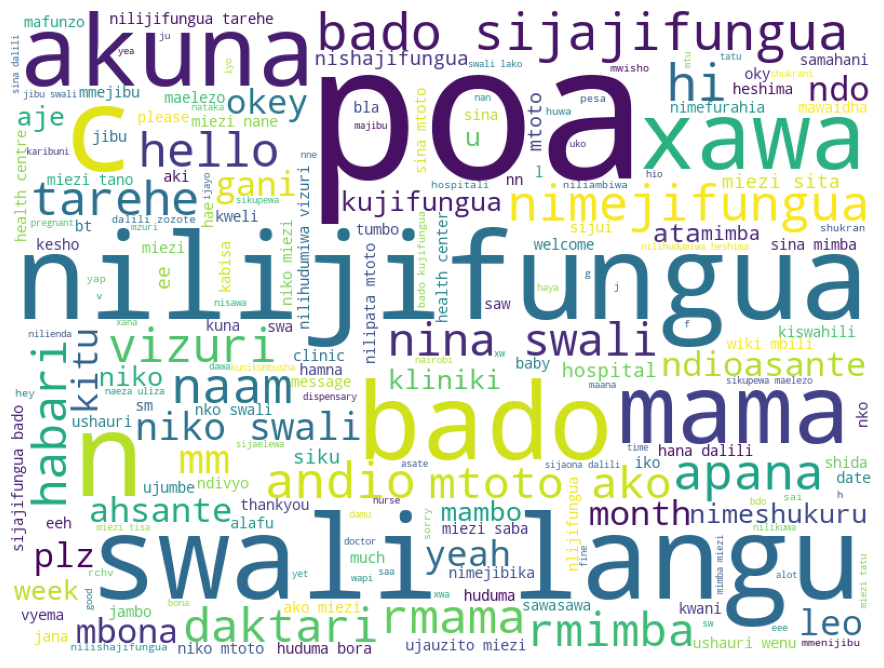

In [311]:
cloud(' '.join(dfNew['new_survey_message_without_stopwords_swa_survey']))

In [312]:
# Get Word Value Counts.
from collections import Counter
dfNew['text_list'] = dfNew['new_survey_message_without_stopwords_swa_survey'].apply(lambda x:str(x).split())
top = Counter([item for sublist in dfNew['text_list'] for item in sublist]) # Counts the frequency of words.
temp = pd.DataFrame(top.most_common(100)) # DataFrame of top 20
temp.columns = ["common_words", "count"]
temp.style.background_gradient(cmap="Blues")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,common_words,count
0,k,49963
1,mtoto,36603
2,swali,26507
3,miezi,25919
4,bado,22052
5,niko,17318
6,nilijifungua,15420
7,poa,15242
8,n,14466
9,vizuri,14367
